You are provided with the following URL: http://eecs.qmul.ac.uk/~emmanouilb/income_table.html. This webpage includes a table on individuals' income and shopping habits - the same that was used in the Week 3 lab.

  1. Inspect the HTML code of the above URL, and provide a short report on the various tags present in the code. What is the function of each unique tag present in the HTML code? [0.5 marks out of 5]
  2. Using Beautiful Soup, scrape the table and convert it into a pandas dataframe. Perform data cleaning when necessary to remove extra characters (no need to handle missing values). In the report include the code that was used to scrape and convert the table and provide evidence that the table has been successfully scraped and converted (e.g. by displaying the contents of the dataframe). [1 mark out of 5]

In [1]:
#Question 1.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from urllib.request import urlopen
from bs4 import BeautifulSoup

#part 2 - scrape the table and convert it into a pandas dataframe.
income_url = "http://eecs.qmul.ac.uk/~emmanouilb/income_table.html"
income_html = urlopen(income_url)  #get HTML content of the page

income_soup = BeautifulSoup(income_html,'lxml') #beautifulsoup instance.

#create header list for data frame.
header_list = []
columns = income_soup.find_all('th')
columns_string = str(columns)
final_header = BeautifulSoup(columns_string,"lxml").get_text()
header_list.append(final_header) #contains header values, ie. column names.

df_header = pd.DataFrame(header_list)
df_header2 = df_header[0].str.split(',',expand=True)
df_header2[0] = df_header2[0].str.strip('[')
df_header2[3] = df_header2[3].str.strip(']')

#read data from all the rows.
table_list = []
rows = income_soup.find_all('tr')
for row in rows[1:]:  #ignoring header row
  row_str = str(row)
  row_value = BeautifulSoup(row_str,"lxml").get_text()
  row_value = row_value.strip('\n')
  table_list.append(row_value)

df_rows = pd.DataFrame(table_list)
df_rows2 = df_rows[0].str.split('\n',expand=True)

frames = [df_header2, df_rows2]
df = pd.concat(frames)
df = df.rename(columns=df.iloc[0])
df = df.drop(df.index[0])
display(df)





,Region,Age,Income,Online Shopper
1,Brazil,32,57600,Yes
2,USA,35,64800,No
3,Brazil,43,73200,No
4,USA,45,,Yes
5,India,40,69600,Yes
6,Brazil,,62400,No
7,India,53,94800,Yes
8,USA,55,99600,No
9,India,42,80400,Yes


2. The list of the various MSc programmes offered by the School of EECS is provided at the following URL: http://eecs.qmul.ac.uk/postgraduate/programmes/. Perform web scraping on the table present in the above URL and convert it into a pandas dataframe that would include one row for each programme of study as shown in the webpage. The dataframe should include the following 5 columns: name of postgraduate degree programme (e.g. Advanced Electronic and Electrical Engineering), programme code for part-time study (e.g. H60C), programme code for full-time study (e.g. H60A), URL for part-time study programme details, URL for full-time study programme details. Perform data cleaning to remove unecessary characters when needed. In the report include the code that was used to scrape, convert and clean the table and provide evidence that the table has been successfully scraped (e.g. by displaying the contents of the dataframe). [1 mark out of 5]

In [6]:
#question 2.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from urllib.request import urlopen
from bs4 import BeautifulSoup

url_mscprog = 'http://eecs.qmul.ac.uk/postgraduate/programmes/'
html_mscprog = urlopen(url_mscprog)
soup_mscprog = BeautifulSoup(html_mscprog,'lxml')

df = pd.DataFrame(columns = ['Programme','Part-time code','Full-time code',
                             'Part-time details','Full-time details'])

#read data from all the rows.
table_list = []
rows = soup_mscprog.find_all('tr')
for row in rows[1:]:  #ignoring header row
  row_str = str(row)
  row_value = BeautifulSoup(row_str,"lxml").get_text()
  row_list = row_value.splitlines()
  row_list.pop(0)
  pt_absent = False
  ft_absent = False
  if row_list[1] == '\xa0':   #part-time code is missing.
    pt_absent = True
  if row_list[2] == '\xa0':   #full-time code is missing.
    ft_absent = True
  
  row_a = row.find_all('a')
  url_list = []
  for hyperlink in row_a:
    url_list.append(hyperlink.get('href'))
  if len(url_list) == 2:
    row_value = row_value + url_list[0] + '\n' + url_list[1]
  else:
    if ft_absent:
      row_value = row_value + url_list[0] + '\n' + ''
    if pt_absent:
      row_value = row_value + '' + '\n' + url_list[0]
  table_list.append(row_value)

df_rows = pd.DataFrame(table_list)
df_rows2 = df_rows[0].str.split('\n',expand=True)
df_rows2.drop(0,1,inplace=True)
df_rows2.columns = ['Programme Name','Part-time code','Full-time code',
                    'Part-time details','Full-time details']
display(df_rows2)


,Programme Name,Part-time code,Full-time code,Part-time details,Full-time details
0,Advanced Electronic and Electrical Engineering,H60C,H60A,https://www.qmul.ac.uk/postgraduate/taught/cou...,https://www.qmul.ac.uk/postgraduate/taught/cou...
1,Artificial Intelligence,I4U2,I4U1,https://www.qmul.ac.uk/postgraduate/taught/cou...,https://www.qmul.ac.uk/postgraduate/taught/cou...
2,Big Data Science,H6J6,H6J7,https://www.qmul.ac.uk/postgraduate/taught/cou...,https://www.qmul.ac.uk/postgraduate/taught/cou...
3,Computer Games,,I4U4,,https://www.qmul.ac.uk/postgraduate/taught/cou...
4,Computer Science,G4U2,G4U1,https://www.qmul.ac.uk/postgraduate/taught/cou...,https://www.qmul.ac.uk/postgraduate/taught/cou...
5,Computer Science by Research,G4Q2,G4Q1,https://www.qmul.ac.uk/postgraduate/taught/cou...,https://www.qmul.ac.uk/postgraduate/taught/cou...
6,Computing and Information Systems,G5U6,G5U5,https://www.qmul.ac.uk/postgraduate/taught/cou...,https://www.qmul.ac.uk/postgraduate/taught/cou...
7,Data Science and Artificial Intelligence by Co...,,I4U5,,https://www.qmul.ac.uk/postgraduate/taught/cou...
8,Electronic Engineering by Research,H6T6,H6T5,https://www.qmul.ac.uk/postgraduate/taught/cou...,https://www.qmul.ac.uk/postgraduate/taught/cou...
9,Internet of Things (Data),I1T2,I1T0,https://www.qmul.ac.uk/postgraduate/taught/cou...,https://www.qmul.ac.uk/postgraduate/taught/cou...


Part 2 - Week 10

4. Load CSV file "timeseries.csv", which contains a univariate timeseries. Once loaded, convert the timeseries into a numpy array and use the numpy flatten() function to ensure that the loaded timeseries is one-dimensional. Compute the Discrete Fourier Transform (DFT) of the timeseries, and display plots for both the original timeseries and the magnitude of its DFT. How many predominant frequency components does the timeseries have? [1 mark out of 5]

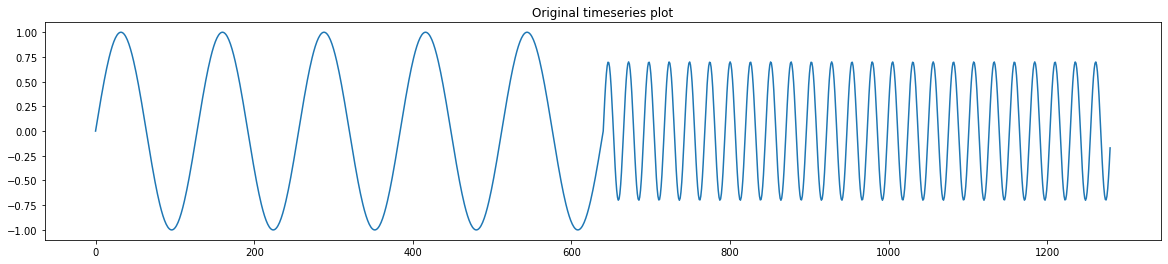

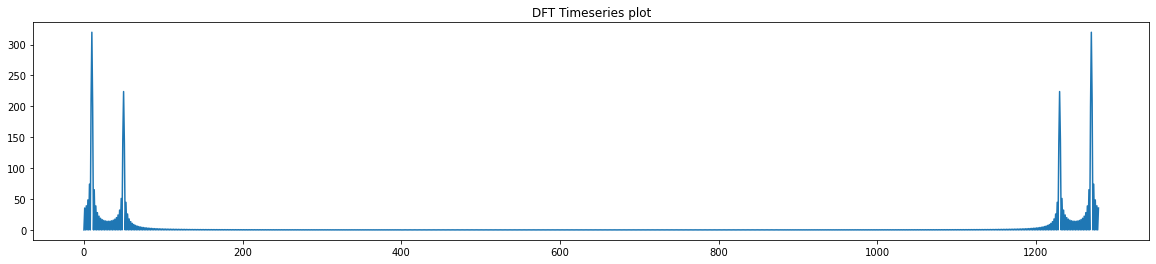

In [4]:
#Question 4.
from pandas import read_csv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

series = read_csv('timeseries.csv', header=None, index_col=False)
arr = series.to_numpy().flatten()

#plot original timeseries data.
plt.figure(figsize=(20,4))
plt.title('Original timeseries plot')
plt.plot(arr)
plt.show()

#compute Discrete Fourier Transform (DFT) of time-series and plot.
dft = np.fft.fft(arr)
plt.figure(figsize=(20,4))
plt.title('DFT Timeseries plot')
plt.plot(np.abs(dft))
plt.show()

5. Using the daily births dataset from this lab tutorial, smooth the timeseries using trailing moving average smoothing and a window size that corresponds to one week; then replace any NaN values with zeros. Perform timeseries forecasting using the smoothed dataset in order to predict daily births for the first 5 days of 1960, using the models below. Show your forecasting results. [0.75 marks out of 5]

     AR model with  p=2  ARMA model with  p=  and  q=2

In [2]:
!pip install statsmodels --upgrade

     |████████████████████████████████| 9.5MB 12.3MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


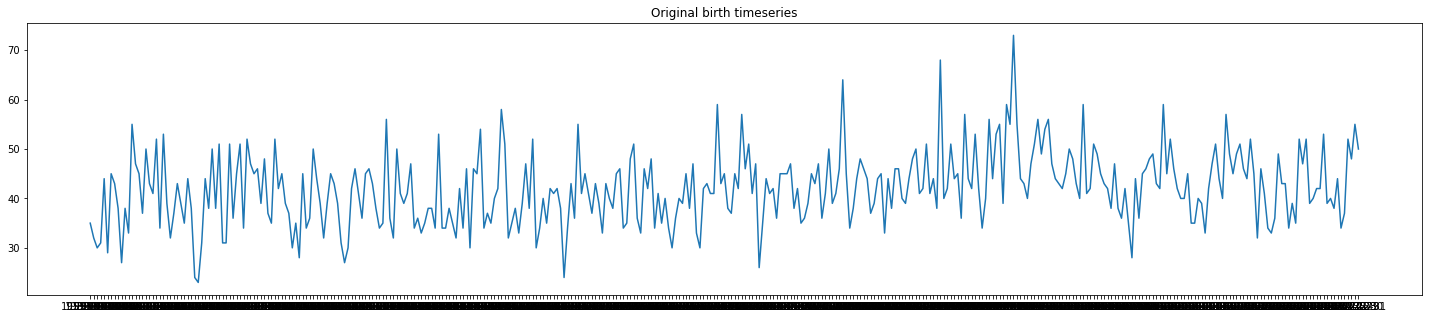

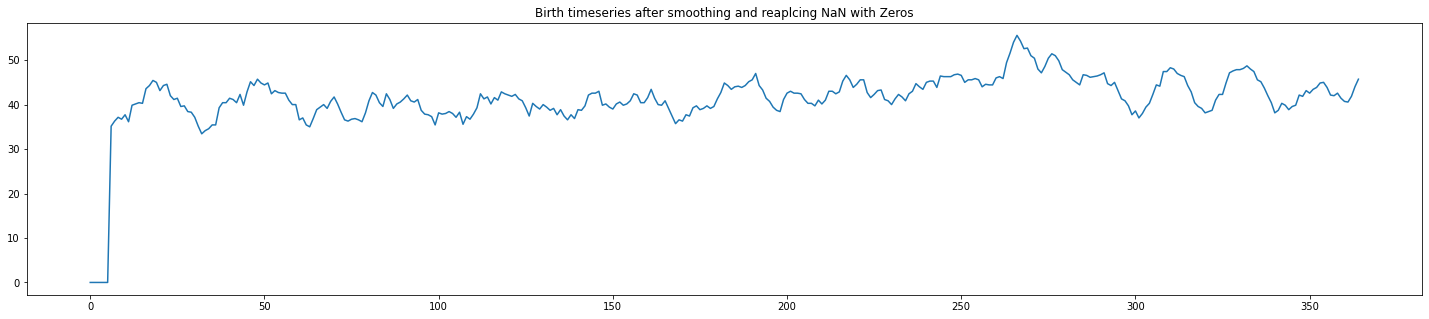

AR model coefficients =  [ 5.49978565  0.93282935 -0.06280082]
Predicted daily births for first 5 days of 1960 using AR Model:
[45.38017715 44.96085234 44.59067614 44.27169885 43.99739484]
ARIMA model coefficients =  [ 4.02187005e+01  1.73850591e+00 -7.55847205e-01 -6.91912460e-01
  1.98540791e-02  5.02867074e+00]
Predicted daily births for first 5 days of 1960 using ARIMA Model:
[45.81025003 45.81877051 45.72809824 45.56402379 45.34731376]


In [2]:
#Question 5.
from pandas import read_csv
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA

series = read_csv('births.csv', header=0, index_col=0)

plt.figure(figsize=(25,5))
plt.title('Original birth timeseries')
plt.plot(series)  #plot original time series.
plt.show()

#Perform trailing moving average smoothing with window size equal to 1 week.
rolling = series.rolling(window=7) # using a window of 7 samples
rolling_mean = rolling.mean()
#Replace NaNs with zeros.
rolling_mean['Births'] = rolling_mean['Births'].fillna(0)

data = rolling_mean.to_numpy()
plt.figure(figsize=(25,5))
plt.title('Birth timeseries after smoothing and reaplcing NaN with Zeros')
plt.plot(data)
plt.show()

#Use AR model with p=2 to predict daily births for the first 5 days of 1960.
#note : the dataset is for births in 1959 only.

#Autoregressive (AR) model.
armodel = AutoReg(data, lags=2,old_names=False) # for p=2
armodel_fit = armodel.fit()
print('AR model coefficients = ',armodel_fit.params)

# Make prediction
aryhat = armodel_fit.predict(len(data), len(data)+4) # arguments denote which dataset indices to predict
print('Predicted daily births for first 5 days of 1960 using AR Model:')
print(aryhat)

#Use ARMA model with p= and q=2 to predict daily births for the first 5 days of 1960.
arima_model = ARIMA(data, order=(2, 0, 2)) # p=2, q=2
arima_model_fit = arima_model.fit()
print('ARIMA model coefficients = ',arima_model_fit.params)

# Make prediction
print('Predicted daily births for first 5 days of 1960 using ARIMA Model:')
arima_yhat = arima_model_fit.predict(len(data), len(data)+4) # arguments denote which dataset indices to predict
print(arima_yhat)

6. Using a similar process used in section 1 of this lab notebook, perform document clustering using k-means on the following wikipedia articles: supervised learning, unsupervised learning, semi-supervised learning, association rule learning, anomaly detection, cluster analysis, dimensionality reduction, regression analysis, statistical classification, data mining, data warehouse, online analytical processing. As with section 1, use the elbow metric to find an appropriate number of clusters. Discuss and display the document clustering results. [0.75 marks out of 5]

In [4]:
!pip install wikipedia

  Created wheel for wikipedia: filename=wikipedia-1.4.0-cp36-none-any.whl size=11686 sha256=e2e564913d58f998a052fb3815cb1ece1e764ba8557815fe12f772f1a613db93
  Stored in directory: /root/.cache/pip/wheels/87/2a/18/4e471fd96d12114d16fe4a446d00c3b38fb9efcb744bd31f4a
Successfully built wikipedia


loading content:  Supervised learning
loading content:  Unsupervised learning
loading content:  Semi-supervised learning
loading content:  Association rule learning
loading content:  Anomaly detection
loading content:  Cluster Analysis
loading content:  Dimensionality Reduction
loading content:  Regression Analysis
loading content:  Statistical Classification
loading content:  Data Mining
loading content:  Data Warehouse
loading content:  Online Analytical Processing
(12, 4220)


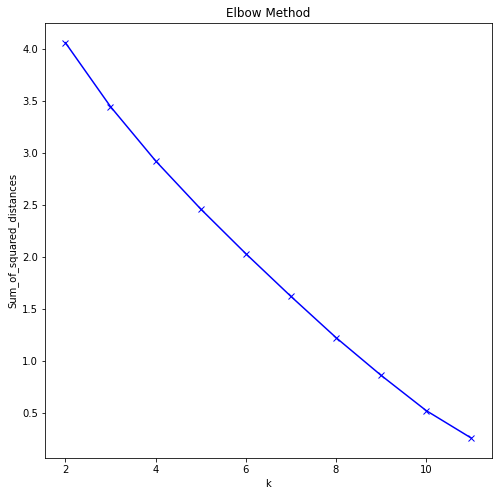

,Title,Cluster
4,Anomaly detection,0
9,Data Mining,1
10,Data Warehouse,1
11,Online Analytical Processing,1
0,Supervised learning,2
1,Unsupervised learning,2
2,Semi-supervised learning,2
3,Association rule learning,2
5,Cluster Analysis,2
6,Dimensionality Reduction,2


In [5]:
#Question 6.
import pandas as pd
import wikipedia
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

articles=['Supervised learning','Unsupervised learning','Semi-supervised learning',
          'Association rule learning','Anomaly detection','Cluster Analysis',
          'Dimensionality Reduction','Regression Analysis', 'Statistical Classification',
          'Data Mining', 'Data Warehouse', 'Online Analytical Processing']
wiki_lst=[]
title=[]

# Load wikipedia articles
for article in articles:
   print("loading content: ",article)
   wiki_lst.append(wikipedia.page(article).content)
   title.append(article)


#Vector space representation
vectorizer = TfidfVectorizer(stop_words={'english'})
X = vectorizer.fit_transform(wiki_lst) # Create tf-idf feature of the wikipedia dataset

print(X.shape) # Print dimensions of tf-idf feature


#Using the elbow metric to find number of clusters.
Sum_of_squared_distances = []
K = range(2,12)
for k in K:
    km = KMeans(n_clusters=k, max_iter=200, n_init=10)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

plt.figure(figsize=(8,8))
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method')
plt.show()

#Choosing 3 as the number of clusters.
true_k = 3
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=200, n_init=10)
model.fit(X)

# Print list of documents and associated clusters
labels=model.labels_
wiki_cl=pd.DataFrame(list(zip(title,labels)),columns=['Title','Cluster'])
display(wiki_cl.sort_values(by=['Cluster']))
